In [126]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [127]:
 data=pd.read_csv("/home/hammadali08/Vidoes/CSV file/Social_Network_Ads.csv")
data.drop(columns=['User ID','Gender'],inplace=True)
data

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [128]:
data['Purchased'].value_counts()

Purchased
0    257
1    143
Name: count, dtype: int64

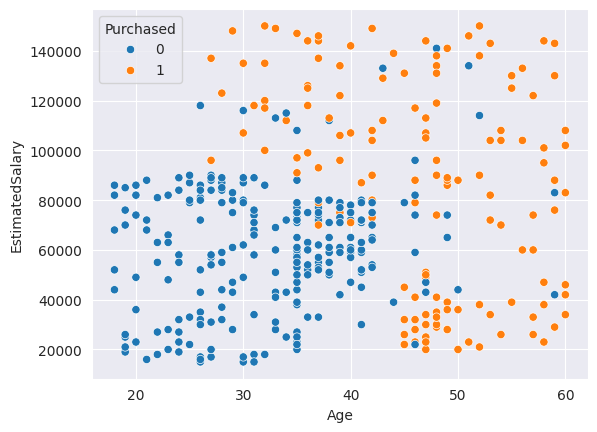

In [129]:
sns.scatterplot(x='Age',y='EstimatedSalary',data=data,hue='Purchased')
plt.show()

In [130]:
x=data.iloc[:,:-1]
y=data['Purchased']

In [131]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [132]:
sc.fit(x)

StandardScaler()

In [133]:
x=pd.DataFrame(sc.transform(x),columns=x.columns)
x

,Age,EstimatedSalary
0,-1.781797,-1.490046
1,-0.253587,-1.460681
2,-1.113206,-0.785290
3,-1.017692,-0.374182
4,-1.781797,0.183751
...,...,...
395,0.797057,-0.844019
396,1.274623,-1.372587
397,1.179110,-1.460681
398,-0.158074,-1.078938


In [134]:
from sklearn.model_selection import train_test_split

In [135]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.2,random_state=0)

In [136]:
from sklearn.neighbors import KNeighborsClassifier

In [137]:
kns=KNeighborsClassifier(n_neighbors=9,p=1)  # P=1 to use Manhatton

In [138]:
kns.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=9, p=1)

In [139]:
kns.score(x_test,y_test),kns.score(x_train,y_train)

(0.8625, 0.95)

In [140]:
for i in range(1,40):
    kn=KNeighborsClassifier(n_neighbors=i)
    kn.fit(x_train,y_train)
    print(i,kn.score(x_test,y_test),kn.score(x_train,y_train))

1 0.890625 1.0
2 0.871875 0.9875
3 0.8875 0.975
4 0.871875 0.9625
5 0.8875 0.9625
6 0.85 0.95
7 0.878125 0.9625
8 0.865625 0.95
9 0.871875 0.95
10 0.853125 0.95
11 0.85625 0.9625
12 0.83125 0.9375
13 0.84375 0.9375
14 0.809375 0.8875
15 0.8125 0.9375
16 0.803125 0.8875
17 0.803125 0.925
18 0.771875 0.8875
19 0.775 0.9125
20 0.765625 0.8625
21 0.76875 0.8875
22 0.7625 0.8625
23 0.76875 0.875
24 0.759375 0.8625
25 0.7625 0.8625
26 0.734375 0.825
27 0.74375 0.8375
28 0.709375 0.8125
29 0.7125 0.8125
30 0.678125 0.75
31 0.68125 0.75
32 0.678125 0.75
33 0.678125 0.75
34 0.665625 0.725
35 0.66875 0.7375
36 0.6625 0.7375
37 0.66875 0.7375
38 0.659375 0.7125
39 0.6625 0.7125


In [141]:
df=pd.DataFrame(y_test , kns.predict(x_test))
df

,Purchased
0,0
0,0
0,0
0,0
0,0
...,...
1,0
1,0
0,0
0,0


In [142]:
from mlxtend.plotting import plot_decision_regions

/home/hammadali08/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


<Axes: >

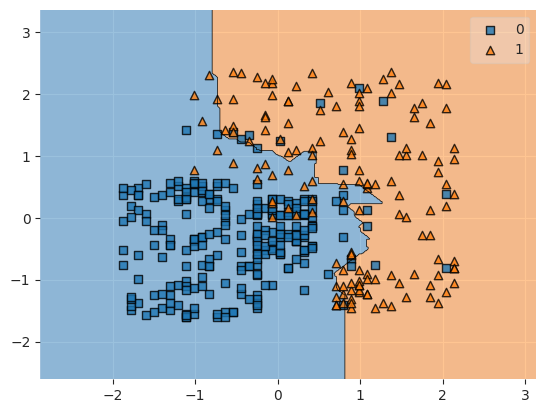

In [143]:
plot_decision_regions(x.to_numpy(),y.to_numpy(),clf=kns)